In [2]:
import pandas as pd
import numpy as np  
import scipy as sp


allergyData = pd.read_csv('data/food-allergy-analysis-Zenodo.csv')

In [3]:
cleanedAllergyData = allergyData.drop(columns=['SUBJECT_ID', 'BIRTH_YEAR'])
#cleanedAllergyData.head(200)

In [ ]:
import matplotlib.pyplot as plt

from scipy.stats import skew 
import seaborn as sns
# Use matplotlib and scipy to describe the statistical data and skewness of column, temp is used to reduce the amount of column name repetition

#Get all numerical attributes
allNumericalData = cleanedAllergyData.drop(columns=['GENDER_FACTOR','RACE_FACTOR','PAYER_FACTOR','ETHNICITY_FACTOR','ATOPIC_MARCH_COHORT'])
replaceMinus = allNumericalData[allNumericalData >= 0]
handleOutliers = replaceMinus[replaceMinus < 20]
handleOutliers['GENDER_FACTOR'] = cleanedAllergyData['GENDER_FACTOR']
handleOutliers['RACE_FACTOR'] = cleanedAllergyData['RACE_FACTOR']
handleOutliers['PAYER_FACTOR'] = cleanedAllergyData['PAYER_FACTOR']
#

AllergenData = handleOutliers
#Better naming
AllergenData['ASTHMA_RX'] = AllergenData['FIRST_ASTHMARX'].notna().astype(int)
EndColumns = [col for col in AllergenData if col.endswith('END')]
AllergenData['PATIENT_CURED'] = AllergenData[EndColumns].notna().any(axis=1).astype(int)


,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,...,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,GENDER_FACTOR,RACE_FACTOR,PAYER_FACTOR,ASTHMA_RX,PATIENT_CURED
0,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,S1 - Female,R1 - Black,P1 - Medicaid,0,0
1,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.262834,18.880219,2.0,S1 - Female,R0 - White,P0 - Non-Medicaid,1,0
2,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,...,5.127995,NaN,1.404517,6.157426,4.0,S0 - Male,R0 - White,P0 - Non-Medicaid,1,1
3,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,S0 - Male,R4 - Unknown,P0 - Non-Medicaid,0,0
4,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,S1 - Female,R1 - Black,P0 - Non-Medicaid,0,0


In [ ]:
#USE to compare allergy end attribute with first_ASTHMARX

#All of the nut allergens with first and last asthmarx
NutAllergies = handleOutliers.filter(regex='NUT|ASTHMARX|CASHEW|PISTACH|PECAN|ALMOND|BRAZIL|AGE|GENDER|RACE|PAYER')
NutColumns = [col for col in NutAllergies if 'NUT' in col.upper()]
NutAllergies = NutAllergies.dropna(subset=NutColumns,how='all')
NutAllergies['ASTHMA_RX'] = NutAllergies['FIRST_ASTHMARX'].notna().astype(int)
CuredColumns = [col for col in NutAllergies if col.endswith('END') and 'ALG' in col]
NutAllergies['PATIENT_CURED'] = NutAllergies[CuredColumns].notna().any(axis=1).astype(int)



#Egg
EggAllergies = handleOutliers.filter(regex='EGG|ASTHMARX|AGE|GENDER|RACE|PAYER')
EggColumns = [col for col in EggAllergies if 'EGG' in col.upper()]
EggAllergies = EggAllergies.dropna(subset=EggColumns)
EggAllergies['ASTHMA_RX'] = EggAllergies['FIRST_ASTHMARX'].notna().astype(int)
EggAllergies['PATIENT_CURED'] = EggAllergies['EGG_ALG_END'].notna().astype(int)

#Wheat
WheatAllergies = handleOutliers.filter(regex='WHEAT|ASTHMARX|AGE|GENDER|RACE|PAYER')
WheatColumns = [col for col in WheatAllergies if 'WHEAT' in col.upper()]
WheatAllergies = WheatAllergies.dropna(subset=WheatColumns)
WheatAllergies['ASTHMA_RX'] = WheatAllergies['FIRST_ASTHMARX'].notna().astype(int)
WheatAllergies['PATIENT_CURED'] = WheatAllergies['WHEAT_ALG_END'].notna().astype(int)

#SOY
SoyAllergies = handleOutliers.filter(regex='SOY|ASTHMARX|AGE|GENDER|RACE|PAYER')
SoyColumns = [col for col in SoyAllergies if 'SOY' in col.upper()]
SoyAllergies = SoyAllergies.dropna(subset=SoyColumns)
SoyAllergies['ASTHMA_RX'] = SoyAllergies['FIRST_ASTHMARX'].notna().astype(int)
SoyAllergies['PATIENT_CURED'] = SoyAllergies['SOY_ALG_END'].notna().astype(int)

#MILK
MilkAllergies = handleOutliers.filter(regex='MILK|ASTHMARX|AGE|GENDER|RACE|PAYER')
MilkColumns = [col for col in MilkAllergies if 'MILK' in col.upper()]
MilkAllergies = MilkAllergies.dropna(subset=MilkColumns)
MilkAllergies['ASTHMA_RX'] = MilkAllergies['FIRST_ASTHMARX'].notna().astype(int)
MilkAllergies['PATIENT_CURED'] = MilkAllergies['MILK_ALG_END'].notna().astype(int)

#FISH
FishAllergies = handleOutliers.filter(regex='FISH|ASTHMARX|AGE|GENDER|RACE|PAYER')
FishColumns = [col for col in FishAllergies if 'FISH' in col.upper()]
print(FishColumns)
FishAllergies = FishAllergies.dropna(subset=FishColumns)
FishAllergies['ASTHMA_RX'] = FishAllergies['FIRST_ASTHMARX'].notna().astype(int)
FishCuredColumns = [col for col in FishAllergies if col.endswith('END') and 'ALG' in col]
FishAllergies['PATIENT_CURED'] = FishAllergies[FishCuredColumns].notna().any(axis=1).astype(int)
print(len(FishAllergies))

#ATOPIC
AtopicAllergies = handleOutliers.filter(regex='ATOPIC|ASTHMARX|AGE|GENDER|RACE|PAYER')
AtopicColumns = [col for col in AtopicAllergies if 'ATOPIC' in col.upper()]
AtopicAllergies = AtopicAllergies.dropna(subset=AtopicColumns)
AtopicAllergies['ASTHMA_RX'] = AtopicAllergies['FIRST_ASTHMARX'].notna().astype(int)
AtopicAllergies['PATIENT_CURED'] = AtopicAllergies['ATOPIC_DERM_END'].notna().astype(int)
#RHINITIS
RhinitisAllergies = handleOutliers.filter(regex='RHINITIS|ASTHMARX|AGE|GENDER|RACE|PAYER')
RhinitisColumns = [col for col in RhinitisAllergies if 'RIHNITIS' in col.upper()]
RhinitisAllergies = RhinitisAllergies.dropna(subset=RhinitisColumns)
RhinitisAllergies['ASTHMA_RX'] = RhinitisAllergies['FIRST_ASTHMARX'].notna().astype(int)
RhinitisAllergies['PATIENT_CURED'] = RhinitisAllergies['ALLERGIC_RHINITIS_END'].notna().astype(int)
#ASTHMA
AsthmaAllergies = handleOutliers.filter(regex='ASTHMA|ASTHMARX|AGE|GENDER|RACE|PAYER')
AsthmaColumns = [col for col in AsthmaAllergies if 'ASTHMA' in col.upper()]
AsthmaAllergies = AsthmaAllergies.dropna(subset=AsthmaColumns)
AsthmaAllergies['ASTHMA_RX'] = AsthmaAllergies['FIRST_ASTHMARX'].notna().astype(int)
AsthmaAllergies['PATIENT_CURED'] = AsthmaAllergies['ASTHMA_END'].notna().astype(int)


688
['SHELLFISH_ALG_START', 'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END']
92
333200
ASTHMA_RX
1    23052
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

# Features to be used for prediction
features = ['PATIENT_CURED', 'RACE_FACTOR', 'GENDER_FACTOR', 'PAYER_FACTOR','AGE_START_YEARS','AGE_END_YEARS']

#encode for catagorical features
X = pd.get_dummies(AllergenData[features])
y = AllergenData['ASTHMA_RX'] # Our target attribute

print(X.shape)
print(y.shape)


# Train/test split
# First split: 80% train, 20% test
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 75% train, 25% validation (of the 80% train data)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.25, random_state=42)

#Handle class imbalance with SMOTE, same random_state for testing.
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

(9143, 12)
(9143,)


In [19]:
X.head(2)

,PATIENT_CURED,AGE_START_YEARS,AGE_END_YEARS,RACE_FACTOR_R0 - White,RACE_FACTOR_R1 - Black,RACE_FACTOR_R2 - Asian or Pacific Islander,RACE_FACTOR_R3 - Other,RACE_FACTOR_R4 - Unknown,GENDER_FACTOR_S0 - Male,GENDER_FACTOR_S1 - Female,PAYER_FACTOR_P0 - Non-Medicaid,PAYER_FACTOR_P1 - Medicaid
8,1,0.019165,6.726899,True,False,False,False,False,True,False,True,False
65,0,0.008214,6.792608,False,True,False,False,False,False,True,True,False


True


In [ ]:

#Use class weights so model to overbias the majority class.



#Fit the model to the training data
#Then make predictions based on the test set
# Done for each of our considered models

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resample, y_train_resample)
y_pred_rf = rf_model.predict(X_test)


gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resample, y_train_resample)
y_pred_gb = gb_model.predict(X_test)


log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg_model.fit(X_train_resample, y_train_resample)
y_pred_log_reg = log_reg_model.predict(X_test)




from sklearn.metrics import classification_report, confusion_matrix

#Print classification report and confusion matrix of our test models

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.42       635
           1       0.69      0.67      0.68      1194

    accuracy                           0.59      1829
   macro avg       0.55      0.55      0.55      1829
weighted avg       0.59      0.59      0.59      1829

Random Forest Confusion Matrix:
[[278 357]
 [397 797]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       635
           1       0.72      0.73      0.73      1194

    accuracy                           0.64      1829
   macro avg       0.60      0.60      0.60      1829
weighted avg       0.64      0.64      0.64      1829

Gradient Boosting Confusion Matrix:
[[300 335]
 [317 877]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.60      0.52       635
  

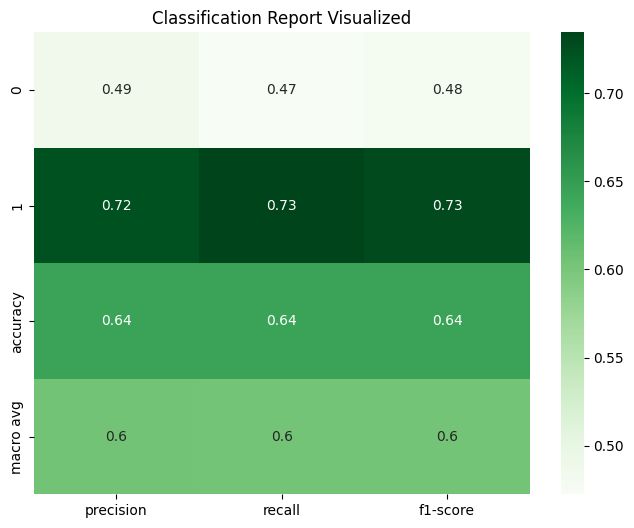

In [ ]:
report = classification_report(y_test, y_pred_gb, output_dict=True)

df_report = pd.DataFrame(report).transpose()


plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Greens')
plt.title('Classification Report Visualized')
plt.show()


In [17]:
import joblib

joblib.dump(gb_model,'gradBoostModel.pkl')

['gradBoostModel.pkl']

In [5]:
#Discretize Data
## Create sub models of the above allergen datasets to model them within "buckets", 
# I believe it would be useful to separate data into age ranges.
# IE 0-5, 5-9, 9-13, 13-17 and so on. Perhaps

#Toddler = 0-5

#Child = 5-9
#YoungTeen = 10-12
# Adult = 13 - 17

labels = ['Toddler','Child','Pre-Teen','Teenager']

NutAllergies['Age_Group'] = pd.cut(NutAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

EggAllergies['Age_Group'] = pd.cut(EggAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

WheatAllergies['Age_Group'] = pd.cut(WheatAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

SoyAllergies['Age_Group'] = pd.cut(SoyAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

MilkAllergies['Age_Group'] = pd.cut(MilkAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

FishAllergies['Age_Group'] = pd.cut(FishAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

AtopicAllergies['Age_Group'] = pd.cut(AtopicAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

RhinitisAllergies['Age_Group'] = pd.cut(RhinitisAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

AsthmaAllergies['Age_Group'] = pd.cut(AsthmaAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)



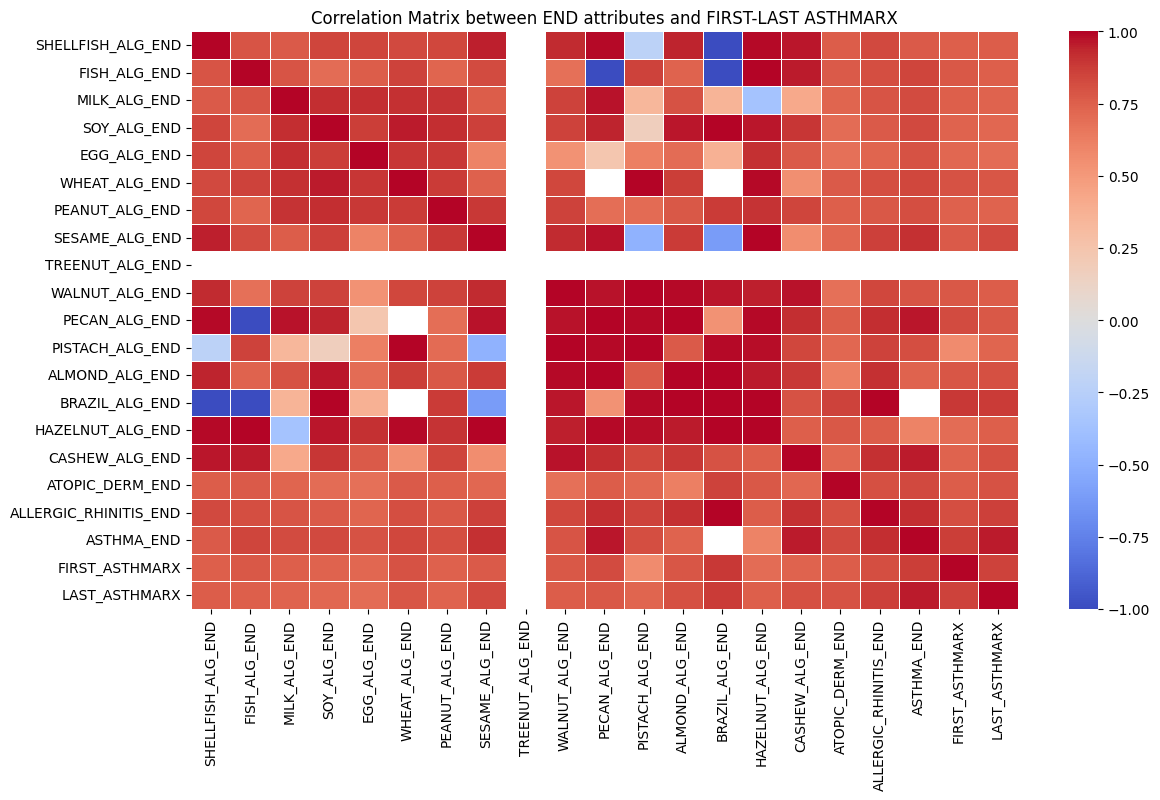

In [ ]:
### Data visualization stuff, ignore for assignment #5
alg_end_coluumns = [ col for col in replaceMinus.columns if col.endswith('_END')]
asth_columns = ['FIRST_ASTHMARX','LAST_ASTHMARX']
compare_columns = alg_end_coluumns + asth_columns

compareEndwAsth = replaceMinus[compare_columns]

corr_matrix = compareEndwAsth.corr()


plt.figure(figsize=(13.33, 7.5)) # Adjust figure size as needed
#corr_matrix = replaceMinus.corr() Uncomment for a general correlation 
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between END attributes and FIRST-LAST ASTHMARX')
plt.show()

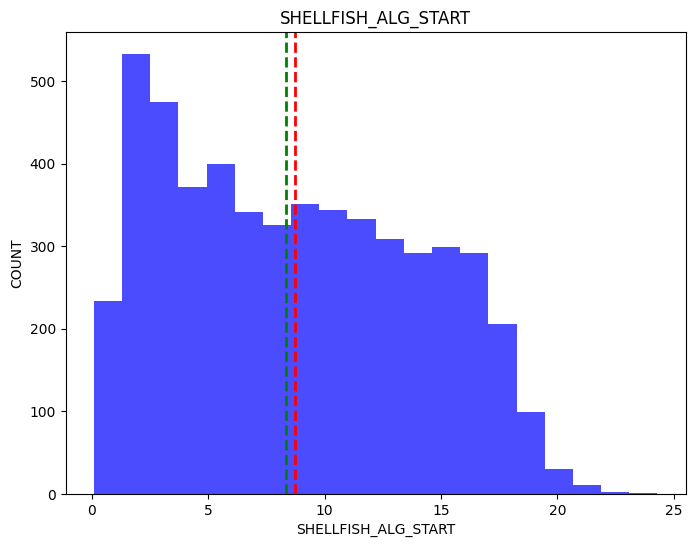

In [104]:
# Better graph creation than above cell.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.hist(cleanedAllergyData['SHELLFISH_ALG_START'], bins=20, color='blue', alpha=0.7)
plt.axvline(cleanedAllergyData['SHELLFISH_ALG_START'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(cleanedAllergyData['SHELLFISH_ALG_START'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('SHELLFISH_ALG_START')
plt.xlabel('SHELLFISH_ALG_START')
plt.ylabel('COUNT')
plt.show()